In [1]:
import pycaret as pc

In [2]:
import pandas as pd

In [3]:
cars_crash=pd.read_csv('Documents//keerthana//data analytics//project//2016CarCrashes.csv')

In [4]:
cars_crash.head()

,State,Population,Vehicle miles traveled (millions),Fatal crashes,Deaths,"Deaths per 100,000 population",Deaths per 100 million vehicle miles traveled,Car occupants,Pickup and SUV occupants,Large truck occupants,...,Unknown mode of transport,Single-vehicle,Multiple-vehicle,Unrestrained fatally injured occupants,Restrained fatally injured occupants,Unknown restraint status of fatally injured occupants,Urban,Rural,Unnamed: 21,Unnamed: 22
0,Alabama,4858979,67257,783,849,18,1,356,279,16,...,27,471,378,355,251,41,249,480,NaN,NaN
1,Alaska,738432,5045,60,65,9,1,13,23,0,...,7,41,24,15,15,8,31,33,NaN,NaN
2,Arizona,6828065,65045,810,893,13,1,260,217,14,...,89,491,402,251,180,64,554,335,NaN,NaN
3,Arkansas,2978204,34897,472,531,18,2,191,181,17,...,23,266,265,190,151,33,155,376,NaN,NaN
4,California,39144818,335539,2925,3176,8,1,1161,581,23,...,84,1806,1370,549,1065,158,1802,1366,NaN,NaN


In [11]:
from pycaret.regression import * 

In [12]:
churn_setup=setup(data=cars_crash,target='Deaths',session_id=3435,ignore_features=['Unnamed: 21','Unnamed: 22','Deaths per 100,000 population','Deaths per 100 million vehicle miles traveled','State'])

 
Setup Succesfully Completed!


,Description,Value
0,session_id,3435
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(51, 23)"
4,Missing Values,True
5,Numeric Features,17
6,Categorical Features,5
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [13]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
1,Ridge Regression,0.032300,0.003400,0.038400,1.000000,0.000100,0.000100
2,Least Angle Regression,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
3,Bayesian Ridge,0.002000,0.000000,0.002100,1.000000,0.000000,0.000000
4,Random Sample Consensus,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
5,TheilSen Regressor,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
6,Lasso Least Angle Regression,4.312200,58.119800,5.457600,0.999700,0.030500,0.022800
7,Elastic Net,7.261800,230.465400,9.657500,0.998200,0.015500,0.012700
8,Lasso Regression,7.545100,235.227400,9.894000,0.998100,0.017800,0.014600
9,Orthogonal Matching Pursuit,44.478700,5108.180800,56.532400,0.965000,0.295600,0.150900


In [15]:
evaluate_models()

NameError: name 'evaluate_models' is not defined

In [16]:
xgboost_model = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,41.6098,2480.5036,49.8047,0.9227,0.1029,0.0781
1,578.1659,869214.4109,932.3167,-3.1381,0.6264,0.8126
2,38.9083,3305.7248,57.4954,0.9674,0.0877,0.0723
3,60.0084,5724.1367,75.6580,0.9226,0.1481,0.1187
4,41.3120,2022.1190,44.9680,0.9728,0.1590,0.1235
5,42.8684,2109.9324,45.9340,0.6218,0.1865,0.1809
6,542.3150,767790.2017,876.2364,0.4958,0.4302,0.2434
7,63.0070,8426.1734,91.7942,0.9106,0.2192,0.2107
8,33.1345,1567.7910,39.5953,0.9900,0.4230,0.3966
9,394.2070,192473.7863,438.7183,0.8759,0.2939,0.2441


In [17]:
tuned_xgboost = tune_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,147.0549,24782.1629,157.4235,0.2278,0.3356,0.2769
1,319.5289,173392.5310,416.4043,0.1745,0.6983,0.9457
2,245.5414,95074.9351,308.3422,0.0625,0.4833,0.3161
3,219.7598,62282.5069,249.5646,0.1580,0.3604,0.3439
4,73.7302,9656.9512,98.2698,0.8699,0.2729,0.1905
5,53.7352,5533.9928,74.3908,0.0080,0.3557,0.2309
6,400.5026,382544.9701,618.5022,0.7488,0.3045,0.2465
7,46.5707,3525.3584,59.3747,0.9626,0.2668,0.2654
8,54.2031,4055.0943,63.6796,0.9740,0.3988,0.4443
9,664.7213,892549.9402,944.7486,0.4243,0.3742,0.2539


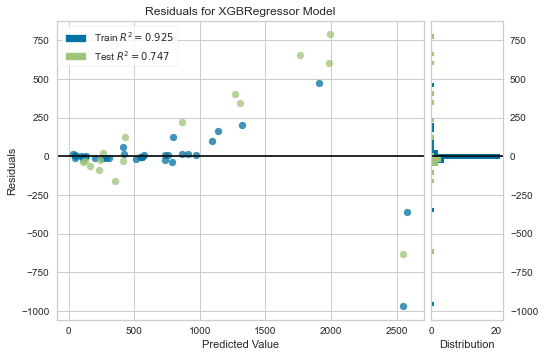

In [18]:
plot_model(tuned_xgboost)

In [19]:
evaluate_model(tuned_xgboost)

,Parameters
base_score,0.5
booster,gbtree
colsample_bylevel,1
colsample_bynode,1
colsample_bytree,0.7
gamma,0
importance_type,gain
learning_rate,0.05
max_delta_step,0
max_depth,100


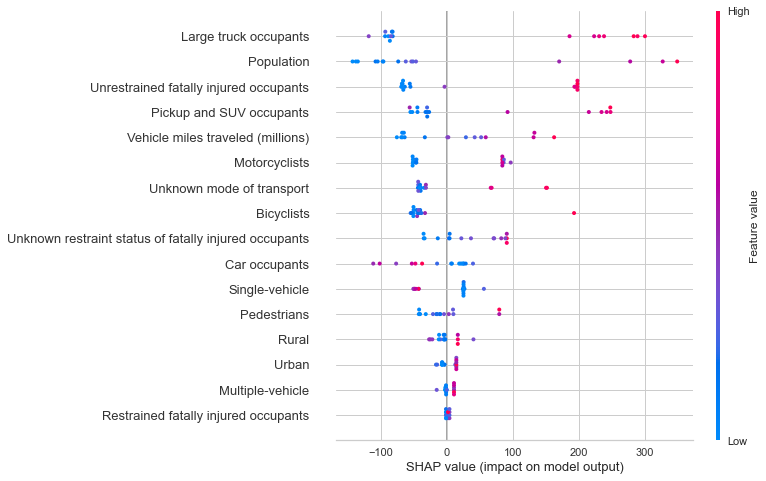

In [20]:
interpret_model(tuned_xgboost)